### Clear GPU

In [ ]:
from keras import backend as K

K.clear_session()

### Import the Datasets in my drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
training_set_path = '/content/drive/My Drive/[2024-2025] AN2DL/Homework 1'
folder_path = '/content/drive/My Drive/Datasets'

### Import all the libraries

In [3]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
import keras as tfk
from keras import layers as tfkl
from keras import regularizers

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

!pip install keras_cv
import keras_cv

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

#Number of Classes in the Dataset
num_classes = 8

2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 50.8 MB/s eta 0:00:00


### Create a function to Load Data and load the datasets needed


In [4]:
def load_data(path):
    # Load dataset from .npz file
    data = np.load(path)

    # Trim dataset to the first 11959 entries and discard the rest
    train_dataset = data['images'][:11959].copy()  # Copy to ensure no reference to the original array
    test_dataset = data['labels'][:11959].copy()

    # Explicitly delete the original data to free up memory
    del data

    return train_dataset, test_dataset

In [5]:
# Execute function and load data
(X_test, y_test) = load_data(training_set_path + "/" +"training_set.npz")

print("Test set shape (images):", X_test.shape)
print("Test set shape (labels):", y_test.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [6]:
# Execute function and load data
(X_test_aug, y_test_aug) = load_data(folder_path + "/" +"augmented_set.npz")

print("Test set shape (images):", X_test_aug.shape)
print("Test set shape (labels):", y_test_aug.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [7]:
# Execute function and load data
(X_test_aug2, y_test_aug2) = load_data(folder_path + "/" +"augmented_set2.npz")

print("Test set shape (images):", X_test_aug2.shape)
print("Test set shape (labels):", y_test_aug2.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [8]:
# Execute function and load data
(X_test_aug3, y_test_aug3) = load_data(folder_path + "/" +"augmented_set3.npz")

print("Test set shape (images):", X_test_aug3.shape)
print("Test set shape (labels):", y_test_aug3.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [9]:
# Execute function and load data
(X_test_aug4, y_test_aug4) = load_data(folder_path + "/" +"augmented_set4.npz")

print("Test set shape (images):", X_test_aug4.shape)
print("Test set shape (labels):", y_test_aug4.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [10]:
# Execute function and load data
(X_test_aug5, y_test_aug5) = load_data(folder_path + "/" +"augmented_set5.npz")

print("Test set shape (images):", X_test_aug5.shape)
print("Test set shape (labels):", y_test_aug5.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [11]:
# Execute function and load data
(X_test_aug6, y_test_aug6) = load_data(folder_path + "/" +"augmented_set6.npz")

print("Test set shape (images):", X_test_aug6.shape)
print("Test set shape (labels):", y_test_aug6.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


### Split Dataset

In [12]:
# Assuming `images` and `labels` are already loaded
print("Dataset shape (images):", X_test.shape)
print("Dataset shape (labels):", y_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

Dataset shape (images): (11959, 96, 96, 3)
Dataset shape (labels): (11959, 1)


### Different Combination of Datasets

In [13]:
# Create different type of concatenations of the datasets
X_test_concat = np.concatenate((X_test, X_test_aug), axis=0)
y_test_concat = np.concatenate((y_test, y_test_aug), axis=0)

print("Test set shape (images):", X_test_concat.shape)
print("Test set shape (labels):", y_test_concat.shape)

Test set shape (images): (23918, 96, 96, 3)
Test set shape (labels): (23918, 1)


In [14]:
# Concatenate datasets
X_test_concat2 = np.concatenate((X_test_concat, X_test_aug2), axis=0)
y_test_concat2 = np.concatenate((y_test_concat, y_test_aug2), axis=0)

print("Test set shape (images):", X_test_concat2.shape)
print("Test set shape (labels):", y_test_concat2.shape)

Test set shape (images): (35877, 96, 96, 3)
Test set shape (labels): (35877, 1)


In [15]:
# Concatenate datasets
X_test_concat3 = np.concatenate((X_test_concat2, X_test_aug3), axis=0)
y_test_concat3 = np.concatenate((y_test_concat2, y_test_aug3), axis=0)

print("Test set shape (images):", X_test_concat3.shape)
print("Test set shape (labels):", y_test_concat3.shape)

Test set shape (images): (47836, 96, 96, 3)
Test set shape (labels): (47836, 1)


In [16]:
X_test_concat_4 = np.concatenate((X_test_aug5, X_test_aug6), axis=0)
y_test_concat_4 = np.concatenate((y_test_aug5, y_test_aug6), axis=0)


print("Test set shape (images):", X_test_concat_4.shape)
print("Test set shape (labels):", y_test_concat_4.shape)

Test set shape (images): (23918, 96, 96, 3)
Test set shape (labels): (23918, 1)


In [17]:
# Concatenate datasets -> All the datasets were made by me
X_test_concat_d = np.concatenate((X_test_aug, X_test_aug3), axis=0)
y_test_concat_d = np.concatenate((y_test_aug, y_test_aug3), axis=0)
X_test_concat_d = np.concatenate((X_test_concat_d, X_test_aug4), axis=0)
y_test_concat_d = np.concatenate((y_test_concat_d, y_test_aug4), axis=0)

print("Test set shape (images):", X_test_concat_d.shape)
print("Test set shape (labels):", y_test_concat_d.shape)

Test set shape (images): (35877, 96, 96, 3)
Test set shape (labels): (35877, 1)


### One-hot Encoding

In [18]:
# Define a function to conditionally one-hot encode a variable if it exists
def conditional_one_hot_encode(var_name, num_classes):
    if var_name in globals() and globals()[var_name] is not None:
        globals()[var_name] = tfk.utils.to_categorical(globals()[var_name], num_classes=num_classes)


# Conditionally apply one-hot encoding to each variable
conditional_one_hot_encode('y_test', num_classes)
conditional_one_hot_encode('y_test_aug', num_classes)
conditional_one_hot_encode('y_test_aug2', num_classes)
conditional_one_hot_encode('y_test_aug3', num_classes)
conditional_one_hot_encode('y_test_aug4', num_classes)
conditional_one_hot_encode('y_test_aug5', num_classes)
conditional_one_hot_encode('y_test_aug6', num_classes)
conditional_one_hot_encode('y_test_concat', num_classes)
conditional_one_hot_encode('y_test_concat2', num_classes)
conditional_one_hot_encode('y_test_concat3', num_classes)
conditional_one_hot_encode('y_test_concat_4', num_classes)
conditional_one_hot_encode('y_test_concat_d', num_classes)

### Define The First - Model

Model: "convnext_xlarge"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_prestem_… │ (None, 96, 96, 3)      │              0 │ input_layer_5[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stem      │ (None, 24, 24, 256)    │         13,056 │ convnext_xlarge_prest… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └                      │ (None, 24, 24, 256)    │         12,544 │ -                      │
│ convnext_xlarge_stem_conv │                        │                │                        │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └                      │ (None, 24, 24, 256)    │            512 │ -                      │
│ convnext_xlarge_stem_lay… │                        │                │                        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │         12,800 │ convnext_xlarge_stem[… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │            512 │ convnext_xlarge_stage… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 1024)   │        263,168 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 1024)   │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │        262,400 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │            256 │ convnext_xlarge_stage… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_36 (Add)         

 Total params: 348,147,968 (1.30 GB)

 Trainable params: 348,147,968 (1.30 GB)

 Non-trainable params: 0 (0.00 B)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.952834 to fit



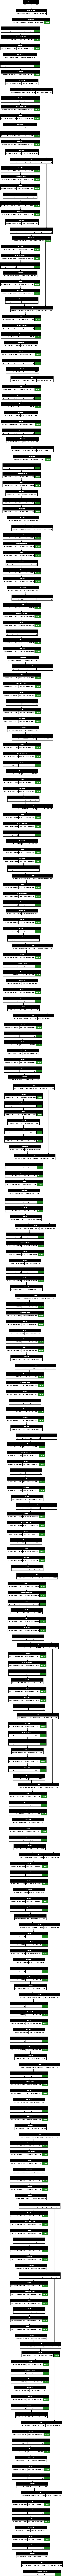

In [ ]:
# Initialise ConvNeXtXLarge model with pretrained weights, for transfer learning
mobilenet =  tf.keras.applications.ConvNeXtXLarge(
    include_top=False,             # Esclude il classificatore finale
    input_shape=(96, 96, 3),       # Dimensioni di input
    weights="imagenet",            # Pesi preaddestrati su ImageNet
    input_tensor=None,             # Tensor di input (lascia None per usare input_shape)
    pooling=None,                  # Nessun pooling; specifica 'avg' per GlobalAveragePooling
    classes=8,                     # Numero di classi (non usato se include_top=False)
    classifier_activation="softmax" # Attivazione del classificatore (non usato se include_top=False)
)


# Display a summary of the model architecture
mobilenet.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
# Specify 'to_file' argument with a path where you have write permissions
tfk.utils.plot_model(mobilenet, to_file='/tmp/model.png', expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenet.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

"""
# Definisci il pipeline completo di augmentazione
augmentation = tf.keras.Sequential([
    # Altre augmentazioni indipendenti
    tfkl.RandomCrop(height=96, width=96),  # Regola la dimensione del crop se necessario
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomRotation(0.3),
    tfkl.Dropout(0.1),
    tfkl.Dropout(0.2),
    tfkl.RandomContrast(0.3),
    tfkl.RandomZoom(0.15),
    tfkl.RandomBrightness(0.1),
], name='advanced_preprocessing')


#Apply the augmentation pipeline
inputs = augmentation(inputs)
"""

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenet(inputs)

x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.4, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout2')(x)

# Add a second dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)
'''
# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout3')(x)

# Add a third dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense3')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm3')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout4')(x)
'''
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Lion optimiser
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer= tfk.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture
tl_model.summary(expand_nested=True)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 348,706,440 (1.30 GB)

 Trainable params: 558,472 (2.13 MB)

 Non-trainable params: 348,147,968 (1.30 GB)

### Train First - Model


In [ ]:
# Train the model
tl_history = tl_model.fit(
    x=X_test_concat2,
    y=y_test_concat2,
    batch_size=64,
    epochs=7,
    validation_data=(X_test_aug6 , y_test_aug6),
    callbacks=[tfk.callbacks.EarlyStopping(
        monitor='val_accuracy',
        mode='max', patience=3,
        restore_best_weights=True
        ),
               tfk.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,        # Riduzione graduale per un modello grande
        patience=2,        # ~25-30% delle epoche totali
        min_lr=1e-7,      # Considerando Adam come optimizer
        verbose=1,
        mode='min',
        min_delta=1e-4,   # Basato sulla scala delle tue loss
        cooldown=1        # Breve periodo di stabilizzazione
          )]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
#model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
#tl_model.save(model_filename)

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
tl_model.save(model_filename)

Epoch 1/7
561/561 ━━━━━━━━━━━━━━━━━━━━ 63s 73ms/step - accuracy: 0.4490 - loss: 1.5072 - val_accuracy: 0.5283 - val_loss: 1.3301 - learning_rate: 0.0010
Epoch 2/7
561/561 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.6150 - loss: 1.0666 - val_accuracy: 0.5539 - val_loss: 1.2719 - learning_rate: 0.0010
Epoch 3/7
561/561 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.6502 - loss: 0.9759 - val_accuracy: 0.5685 - val_loss: 1.2329 - learning_rate: 0.0010
Epoch 4/7
561/561 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.6618 - loss: 0.9569 - val_accuracy: 0.5772 - val_loss: 1.2094 - learning_rate: 0.0010
Epoch 5/7
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.6747 - loss: 0.9196 - val_accuracy: 0.5755 - val_loss: 1.2173 - learning_rate: 0.0010
Epoch 6/7
561/561 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.6814 - loss: 0.8961 - val_accuracy: 0.5854 - val_loss: 1.2041 - learning_rate: 0.0010
Epoch 7/7
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.6850 - loss: 0.

In [ ]:
# Save a copy in my Drive just in case the GPU session is disconnected
!cp Blood_Cells_MobileNetV3S_58.54.keras /content/drive/MyDrive/

### Test the First - Model


In [ ]:
# Generate predictions on the test set and print a classification report
y_pred = tl_model.predict(X_test_aug3)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug3.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

del tl_model

374/374 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       852
           1       0.66      0.69      0.68      2181
           2       0.61      0.42      0.49      1204
           3       0.50      0.60      0.54      1907
           4       0.46      0.57      0.51       894
           5       0.51      0.26      0.35      1087
           6       0.62      0.64      0.63      2415
           7       0.62      0.82      0.71      1419

    accuracy                           0.58     11959
   macro avg       0.57      0.55      0.54     11959
weighted avg       0.58      0.58      0.57     11959



### First Fine - Tuning


In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_58.54.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 349,823,386 (1.30 GB)

 Trainable params: 558,472 (2.13 MB)

 Non-trainable params: 348,147,968 (1.30 GB)

 Optimizer params: 1,116,946 (4.26 MB)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

3 convnext_xlarge_stage_0_block_0_depthwise_conv Conv2D True
10 convnext_xlarge_stage_0_block_1_depthwise_conv Conv2D True
17 convnext_xlarge_stage_0_block_2_depthwise_conv Conv2D True
25 convnext_xlarge_stage_1_block_0_depthwise_conv Conv2D True
32 convnext_xlarge_stage_1_block_1_depthwise_conv Conv2D True
39 convnext_xlarge_stage_1_block_2_depthwise_conv Conv2D True
47 convnext_xlarge_stage_2_block_0_depthwise_conv Conv2D True
54 convnext_xlarge_stage_2_block_1_depthwise_conv Conv2D True
61 convnext_xlarge_stage_2_block_2_depthwise_conv Conv2D True
68 convnext_xlarge_stage_2_block_3_depthwise_conv Conv2D True
75 convnext_xlarge_stage_2_block_4_depthwise_conv Conv2D True
82 convnext_xlarge_stage_2_block_5_depthwise_conv Conv2D True
89 convnext_xlarge_stage_2_block_6_depthwise_conv Conv2D True
96 convnext_xlarge_stage_2_block_7_depthwise_conv Conv2D True
103 convnext_xlarge_stage_2_block_8_depthwise_conv Conv2D True
110 convnext_xlarge_stage_2_block_9_depthwise_conv Conv2D True
117 con

0 input_layer_5 False
1 convnext_xlarge_prestem_normalization False
2 convnext_xlarge_stem False
3 convnext_xlarge_stage_0_block_0_depthwise_conv False
4 convnext_xlarge_stage_0_block_0_layernorm False
5 convnext_xlarge_stage_0_block_0_pointwise_conv_1 False
6 convnext_xlarge_stage_0_block_0_gelu False
7 convnext_xlarge_stage_0_block_0_pointwise_conv_2 False
8 convnext_xlarge_stage_0_block_0_layer_scale False
9 convnext_xlarge_stage_0_block_0_identity False
10 convnext_xlarge_stage_0_block_1_depthwise_conv False
11 convnext_xlarge_stage_0_block_1_layernorm False
12 convnext_xlarge_stage_0_block_1_pointwise_conv_1 False
13 convnext_xlarge_stage_0_block_1_gelu False
14 convnext_xlarge_stage_0_block_1_pointwise_conv_2 False
15 convnext_xlarge_stage_0_block_1_layer_scale False
16 convnext_xlarge_stage_0_block_1_identity False
17 convnext_xlarge_stage_0_block_2_depthwise_conv False
18 convnext_xlarge_stage_0_block_2_layernorm False
19 convnext_xlarge_stage_0_block_2_pointwise_conv_1 False
2

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 349,823,386 (1.30 GB)

 Trainable params: 1,684,872 (6.43 MB)

 Non-trainable params: 347,021,568 (1.29 GB)

 Optimizer params: 1,116,946 (4.26 MB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.930643 to fit



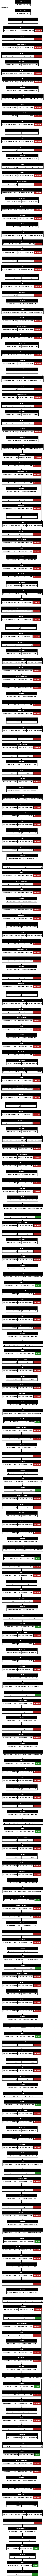

In [ ]:
# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_concat_d,
    y = y_test_concat_d,
    batch_size = 32,
    epochs = 2,
    validation_data = (X_test_aug2, y_test_aug2)
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

Epoch 1/2
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 87s 53ms/step - accuracy: 0.6965 - loss: 0.8748 - val_accuracy: 0.7139 - val_loss: 0.8378
Epoch 2/2
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.7919 - loss: 0.6131 - val_accuracy: 0.7335 - val_loss: 0.7782
Final validation accuracy: 73.35%


In [ ]:
# Save a copy in my Drive just in case the GPU session is disconnected
!cp Blood_Cells_MobileNetV3S_73.35.keras /content/drive/MyDrive/

### Test After Fist Fine - Tuning

In [ ]:
# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug5)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug5.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

del ft_model

374/374 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       852
           1       0.89      0.79      0.84      2181
           2       0.73      0.66      0.69      1213
           3       0.59      0.72      0.65      1898
           4       0.79      0.54      0.64       888
           5       0.59      0.49      0.54      1098
           6       0.73      0.78      0.75      2432
           7       0.75      0.91      0.82      1397

    accuracy                           0.72     11959
   macro avg       0.72      0.69      0.70     11959
weighted avg       0.73      0.72      0.72     11959



### Second Fine - Tuning

In [20]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('/content/Blood_Cells_MobileNetV3S_73.35.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 352,792,986 (1.31 GB)

 Trainable params: 2,043,272 (7.79 MB)

 Non-trainable params: 346,663,168 (1.29 GB)

 Optimizer params: 4,086,546 (15.59 MB)

In [21]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

3 convnext_xlarge_stage_0_block_0_depthwise_conv Conv2D True
10 convnext_xlarge_stage_0_block_1_depthwise_conv Conv2D True
17 convnext_xlarge_stage_0_block_2_depthwise_conv Conv2D True
25 convnext_xlarge_stage_1_block_0_depthwise_conv Conv2D True
32 convnext_xlarge_stage_1_block_1_depthwise_conv Conv2D True
39 convnext_xlarge_stage_1_block_2_depthwise_conv Conv2D True
47 convnext_xlarge_stage_2_block_0_depthwise_conv Conv2D True
54 convnext_xlarge_stage_2_block_1_depthwise_conv Conv2D True
61 convnext_xlarge_stage_2_block_2_depthwise_conv Conv2D True
68 convnext_xlarge_stage_2_block_3_depthwise_conv Conv2D True
75 convnext_xlarge_stage_2_block_4_depthwise_conv Conv2D True
82 convnext_xlarge_stage_2_block_5_depthwise_conv Conv2D True
89 convnext_xlarge_stage_2_block_6_depthwise_conv Conv2D True
96 convnext_xlarge_stage_2_block_7_depthwise_conv Conv2D True
103 convnext_xlarge_stage_2_block_8_depthwise_conv Conv2D True
110 convnext_xlarge_stage_2_block_9_depthwise_conv Conv2D True
117 con

0 input_layer_5 False
1 convnext_xlarge_prestem_normalization False
2 convnext_xlarge_stem False
3 convnext_xlarge_stage_0_block_0_depthwise_conv False
4 convnext_xlarge_stage_0_block_0_layernorm False
5 convnext_xlarge_stage_0_block_0_pointwise_conv_1 False
6 convnext_xlarge_stage_0_block_0_gelu False
7 convnext_xlarge_stage_0_block_0_pointwise_conv_2 False
8 convnext_xlarge_stage_0_block_0_layer_scale False
9 convnext_xlarge_stage_0_block_0_identity False
10 convnext_xlarge_stage_0_block_1_depthwise_conv False
11 convnext_xlarge_stage_0_block_1_layernorm False
12 convnext_xlarge_stage_0_block_1_pointwise_conv_1 False
13 convnext_xlarge_stage_0_block_1_gelu False
14 convnext_xlarge_stage_0_block_1_pointwise_conv_2 False
15 convnext_xlarge_stage_0_block_1_layer_scale False
16 convnext_xlarge_stage_0_block_1_identity False
17 convnext_xlarge_stage_0_block_2_depthwise_conv False
18 convnext_xlarge_stage_0_block_2_layernorm False
19 convnext_xlarge_stage_0_block_2_pointwise_conv_1 False
2

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 352,792,986 (1.31 GB)

 Trainable params: 2,043,272 (7.79 MB)

 Non-trainable params: 346,663,168 (1.29 GB)

 Optimizer params: 4,086,546 (15.59 MB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.930643 to fit



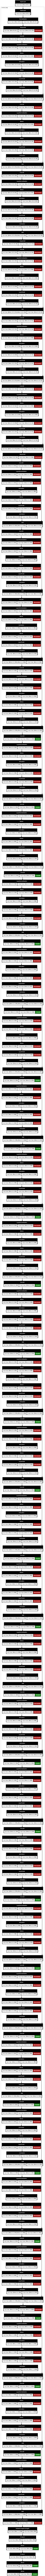

In [22]:
# Set the number of layers to freeze
N = 70

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [23]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_concat_4,
    y = y_test_concat_4,
    batch_size = 64,
    epochs = 3,
    validation_data = (X_test_aug4, y_test_aug4)
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug2)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug2.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug3)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug3.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Epoch 1/3
374/374 ━━━━━━━━━━━━━━━━━━━━ 96s 159ms/step - accuracy: 0.7056 - loss: 0.8581 - val_accuracy: 0.9655 - val_loss: 0.1426
Epoch 2/3
374/374 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.8008 - loss: 0.5930 - val_accuracy: 0.9589 - val_loss: 0.1494
Epoch 3/3
374/374 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.8634 - loss: 0.4175 - val_accuracy: 0.9502 - val_loss: 0.1928
Final validation accuracy: 96.55%
374/374 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       852
           1       0.87      0.90      0.88      2181
           2       0.85      0.66      0.74      1212
           3       0.62      0.80      0.70      1899
           4       0.78      0.77      0.77       884
           5       0.68      0.52      0.59      1103
           6       0.85      0.75      0.80      2390
           7       0.79      0.96      0.86      1438

    accuracy            

In [ ]:
!cp Blood_Cells_MobileNetV3S_96.55.keras /content/drive/MyDrive/

### Third Fine - Tuning

In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('/content/drive/MyDrive/Blood_Cells_MobileNetV3S_96.55.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

In [ ]:
# Set the number of layers to freeze
N = 70

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [24]:
# Constants
BATCH_SIZE = 32
IMAGE_SIZE = 96
AUTO = tf.data.AUTOTUNE

# Define the augmentation pipeline using keras_cv
data_augmentation = keras_cv.layers.Augmenter(
    [
        keras_cv.layers.AutoContrast(value_range=(0, 255)),
        keras_cv.layers.AugMix(severity=0.5, value_range=(0, 255)),
        keras_cv.layers.ChannelShuffle(),
        keras_cv.layers.GridMask(),
        keras_cv.layers.JitteredResize(target_size=(IMAGE_SIZE, IMAGE_SIZE), scale_factor=(1.0, 1.2)),
        keras_cv.layers.RandAugment(magnitude=0.5, value_range=(0, 255)),
        keras_cv.layers.RandomAugmentationPipeline(
            layers=[
                keras_cv.layers.RandomChannelShift(value_range=(0, 255), factor=0.1),
                keras_cv.layers.RandomColorDegeneration(factor=0.5),
                keras_cv.layers.RandomCutout(height_factor=0.2, width_factor=0.2),
                keras_cv.layers.RandomHue(factor=0.2, value_range=(0, 255)),
                keras_cv.layers.RandomSaturation(factor=0.2),
                keras_cv.layers.RandomSharpness(factor=0.2, value_range=(0, 255)),
                keras_cv.layers.RandomShear(x_factor=0.2, y_factor=0.2),
                keras_cv.layers.Solarization(value_range=(0, 255))
            ],
            augmentations_per_image=2
        ),
    ]
)

# Define training dataset with augmentations
train_ds_rand = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(BATCH_SIZE * 100)  # Shuffle the dataset
    .batch(BATCH_SIZE)  # Batch the data
    .map(  # Resize images to IMAGE_SIZE
        lambda x, y: (tf.image.resize(x, (IMAGE_SIZE, IMAGE_SIZE)), y),
        num_parallel_calls=AUTO,
    )
    .map(  # Apply keras_cv augmentations
        lambda x, y: (
            data_augmentation(tf.cast(x, tf.uint8)),  # Augment images only
            y,
        ),
        num_parallel_calls=AUTO,
    )
    .prefetch(AUTO)  # Prefetch data for performance
)

# Define validation dataset with augmentations
val_ds = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(BATCH_SIZE)  # Batch the data
    .map(  # Resize images to IMAGE_SIZE
        lambda x, y: (tf.image.resize(x, (IMAGE_SIZE, IMAGE_SIZE)), y),
        num_parallel_calls=AUTO,
    )
    .map(  # Apply keras_cv augmentations (for validation)
        lambda x, y: (
            data_augmentation(tf.cast(x, tf.uint8)),  # Augment images only
            y,
        ),
        num_parallel_calls=AUTO,
    )
    .prefetch(AUTO)  # Prefetch data for performance
)

ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=6.25000029685907e-05), metrics=['accuracy'])
# Assuming your model `ft_model` is already defined
ft_model.fit(
    train_ds_rand,
    validation_data=val_ds,
    epochs=60,
    steps_per_epoch=512,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=7, restore_best_weights=False),
                 tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Riduzione graduale per un modello grande
    patience=3,        # ~25-30% delle epoche totali
    min_lr=1e-7,      # Considerando Adam come optimizer
    verbose=1,
    mode='min',
    min_delta=1e-4,   # Basato sulla scala delle tue loss
    cooldown=1        # Breve periodo di stabilizzazione
)]
)


# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Final_Model.keras'
ft_model.save(model_filename)

!cp Final_Model.keras /content/drive/MyDrive/

Epoch 1/60
512/512 ━━━━━━━━━━━━━━━━━━━━ 156s 206ms/step - accuracy: 0.8093 - loss: 0.6541 - val_accuracy: 0.8222 - val_loss: 0.5526 - learning_rate: 6.2500e-05
Epoch 2/60
512/512 ━━━━━━━━━━━━━━━━━━━━ 73s 133ms/step - accuracy: 0.8139 - loss: 0.5866 - val_accuracy: 0.8304 - val_loss: 0.5150 - learning_rate: 6.2500e-05
Epoch 3/60
512/512 ━━━━━━━━━━━━━━━━━━━━ 72s 131ms/step - accuracy: 0.8095 - loss: 0.5807 - val_accuracy: 0.8263 - val_loss: 0.5196 - learning_rate: 6.2500e-05
Epoch 4/60
512/512 ━━━━━━━━━━━━━━━━━━━━ 72s 131ms/step - accuracy: 0.8090 - loss: 0.5628 - val_accuracy: 0.8366 - val_loss: 0.4938 - learning_rate: 6.2500e-05
Epoch 5/60
512/512 ━━━━━━━━━━━━━━━━━━━━ 72s 131ms/step - accuracy: 0.8163 - loss: 0.5323 - val_accuracy: 0.8360 - val_loss: 0.4965 - learning_rate: 6.2500e-05
Epoch 6/60
512/512 ━━━━━━━━━━━━━━━━━━━━ 72s 131ms/step - accuracy: 0.8125 - loss: 0.5442 - val_accuracy: 0.8253 - val_loss: 0.5014 - learning_rate: 6.2500e-05
Epoch 7/60
512/512 ━━━━━━━━━━━━━━━━━━━━ 72s 1

### Test Third Fine - Tuning

In [28]:
# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug2)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug2.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug3)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug3.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_train)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_train.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

del ft_model

374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       852
           1       0.91      0.91      0.91      2181
           2       0.86      0.70      0.78      1212
           3       0.69      0.81      0.75      1899
           4       0.79      0.79      0.79       884
           5       0.76      0.55      0.64      1103
           6       0.83      0.82      0.83      2390
           7       0.80      0.97      0.88      1438

    accuracy                           0.81     11959
   macro avg       0.81      0.79      0.79     11959
weighted avg       0.81      0.81      0.81     11959

374/374 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       852
           1       0.93      0.91      0.92      2181
           2       0.87      0.74      0.80      1204
 

### Submit Section


In [30]:
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""

In [31]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('Final_Model.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting model.py


In [32]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
# The original path was incorrect. Using f-string to format correctly.
!zip {filename} model.py Final_Model.keras

  adding: model.py (deflated 56%)
  adding: Final_Model.keras (deflated 7%)


In [33]:
!cp /content/submission_241123_234605.zip /content/drive/MyDrive/submissions